# Challenge 2: Kernel Ridge Regression and Kernel PCA
Riccardo Striano

<a target="_blank" href="https://colab.research.google.com/github/LucaPennella/Intro_to_ML_23-24/blob/main/challenges/challenge_two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 700
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 100

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [47]:
def report(X_train,y_train,X_test,y,y_test):
    from sklearn.metrics import root_mean_squared_error
    print('RMSE',root_mean_squared_error(y, y_test))
    plt.plot(X_train,y_train, 'o', markersize= 2 )
    plt.plot(X_test,y)
    plt.title('Linear RR')
    plt.show()

RMSE 26.809865550540362


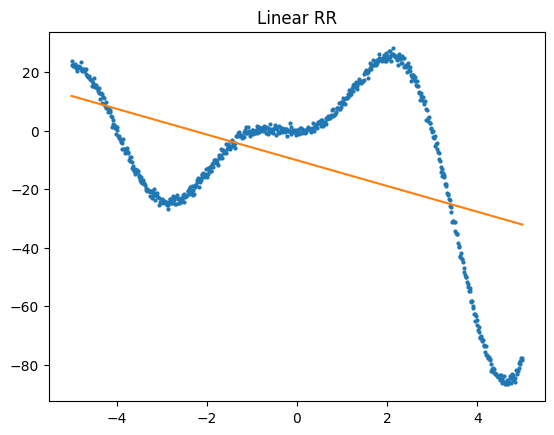

In [48]:
from sklearn.linear_model import Ridge
RR = Ridge()
RR.fit(X_train,y_train)
y_pred = RR.predict(X_test)
report(X_train,y_train,X_test,y_pred,y_test)

In [41]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import root_mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import numpy as np

KRR = KernelRidge(alpha=0.5,kernel='rbf')
param_grid = { 'gamma':[0.01,0.1,1,5,10,20,50,100,200,1000]}

grid_search = GridSearchCV(KRR, param_grid, cv=5, scoring=make_scorer(root_mean_squared_error, greater_is_better=False))

grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print('param: ', grid_search.cv_results_['params'], '\nRMSEs: ', grid_search.cv_results_['mean_test_score'])
print("Migliori parametri:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE finale:", rmse)


param:  [{'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 5}, {'gamma': 10}, {'gamma': 20}, {'gamma': 50}, {'gamma': 100}, {'gamma': 200}, {'gamma': 1000}] 
RMSEs:  [-45.29594487 -26.51711093 -17.6695368  -21.21215229 -21.97828103
 -22.48054356 -22.91525613 -23.12315551 -23.26916533 -23.45407654]
Migliori parametri: {'gamma': 1}
RMSE finale: 0.33929634334146586


gamma =  1
RMSE 0.33929634334146586


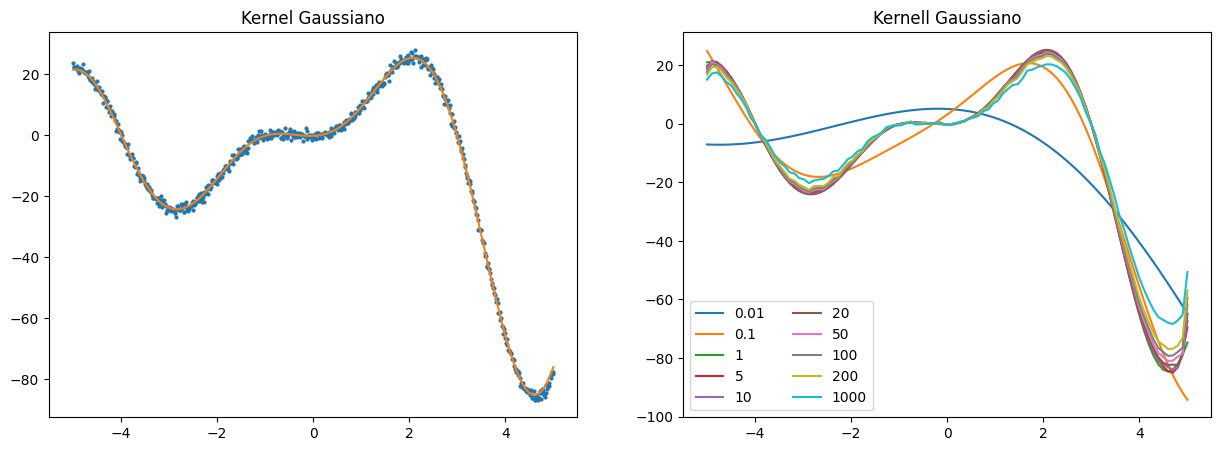

In [60]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import root_mean_squared_error
import numpy as np
RMSEs = [float('inf')]
best_gamma = 0
gamma_range = [0.01,0.1,1,5,10,20,50,100,200,1000]
y_preds = []

for g in gamma_range:
    KRR = KernelRidge(alpha=1,kernel='rbf',gamma=g)
    KRR.fit(X_train,y_train)
    y_pred = KRR.predict(X_test)
    y_preds.append(y_pred)
    rmse = root_mean_squared_error(y_pred, y_test)
    if rmse < min(RMSEs):
        best_gamma = g
    RMSEs.append(rmse)
KRR = KernelRidge(alpha=0.5,kernel='rbf',gamma=best_gamma)
KRR.fit(X_train,y_train)
y_pred = KRR.predict(X_test)
print('gamma = ',best_gamma)
print('RMSE',root_mean_squared_error(y_pred, y_test))

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_train,y_train, 'o' , markersize= 2)
ax[0].plot(X_test,y_pred)
ax[0].set_title('Kernel Gaussiano')
for y,g in zip(y_preds, gamma_range):
    ax[1].plot(X_test,y, label=g)
    ax[1].set_title('Kernell Gaussiano')
plt.legend(ncol = 2)
plt.show()


C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\l

alpha =  0.001 degree =  14


C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


RMSE 0.16390031974655384


C:\Users\pitom\AppData\Local\Temp\ipykernel_28604\4139233009.py:48: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax[1].plot(X_test,y, label=g)


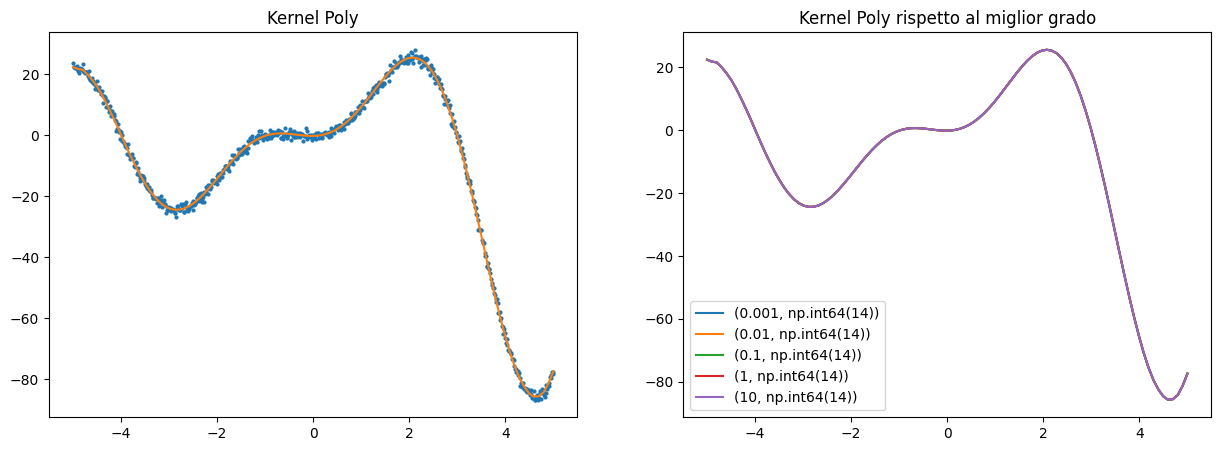

In [56]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import root_mean_squared_error
import numpy as np
RMSEs = [float('inf')]
params = []
best_alpha = 0
best_degree = 0
alpha_range = [0.001,0.01,0.1,1,10]
degree_range = np.arange(1,20)
k_y_preds = []

for a in alpha_range:
    temp_alpha = 0
    temp_mrse = float('inf')
    temp_y = []
    temp_degree = 0

    for d in degree_range:
        KRR = KernelRidge(alpha=a,kernel='poly',degree = d, coef0=20)
        KRR.fit(X_train,y_train)
        y_pred = KRR.predict(X_test)
        rmse = root_mean_squared_error(y_pred, y_test)

        if rmse < temp_mrse:
            temp_degree = d
            temp_y = y_pred
            temp_mrse = rmse

    if temp_mrse < min(RMSEs):
        best_alpha = a
        best_degree = temp_degree

    params.append((a,temp_degree))
    RMSEs.append(temp_mrse)
    k_y_preds.append(temp_y)


print('alpha = ', best_alpha, 'degree = ', best_degree)
KRR = KernelRidge(alpha=best_alpha,kernel='poly',degree=best_degree, coef0=20)
KRR.fit(X_train,y_train)
y_pred = KRR.predict(X_test)
print('RMSE',root_mean_squared_error(y_pred, y_test))
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_train,y_train, 'o', markersize = 2 )
ax[0].plot(X_test,y_pred)
ax[0].set_title('Kernel Poly')
for y,g in zip(k_y_preds, params):
    ax[1].plot(X_test,y, label=g)
    ax[1].set_title('Kernel Poly rispetto al miglior grado')
plt.legend()
plt.show()

C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\pitom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\l

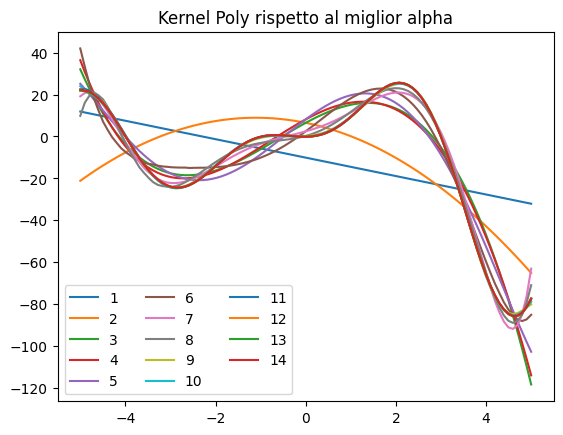

In [59]:
ys = []
for d in degree_range[0:14]:
    KRR = KernelRidge(alpha=0.001,kernel='poly',degree = d, coef0=20)
    KRR.fit(X_train,y_train)
    y_pred = KRR.predict(X_test)
    ys.append(y_pred)

for y,g in zip(ys, degree_range):
    plt.plot(X_test,y, label = g)
plt.legend(ncol = 3)
plt.title('Kernel Poly rispetto al miglior alpha')
plt.show()
        

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [12]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

Text(0.5, 1.0, 'Original Data')

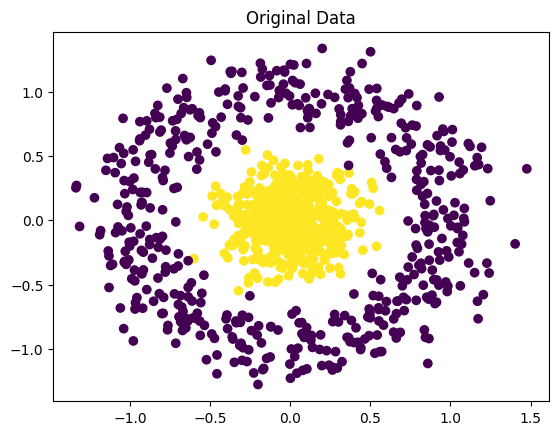

In [13]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'viridis')
plt.title('Original Data')

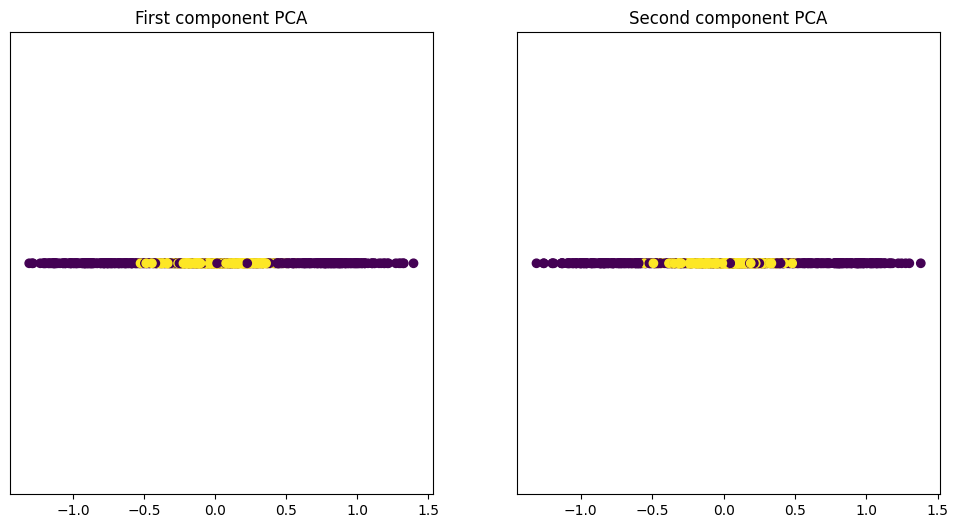

In [14]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(1,2,figsize=(12,6))
  
ax[0].scatter(X_pca[:,0], [1] * len(X_pca[:,0]),c = y, cmap = 'viridis')
ax[0].set_yticks([])  
ax[0].set_title('First component PCA')
ax[1].scatter(X_pca[:,1], [1] * len(X_pca[:,0]), c = y, cmap = 'viridis')
ax[1].set_yticks([])  
ax[1].set_title('Second component PCA')

XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y, stratify = y, random_state=0)

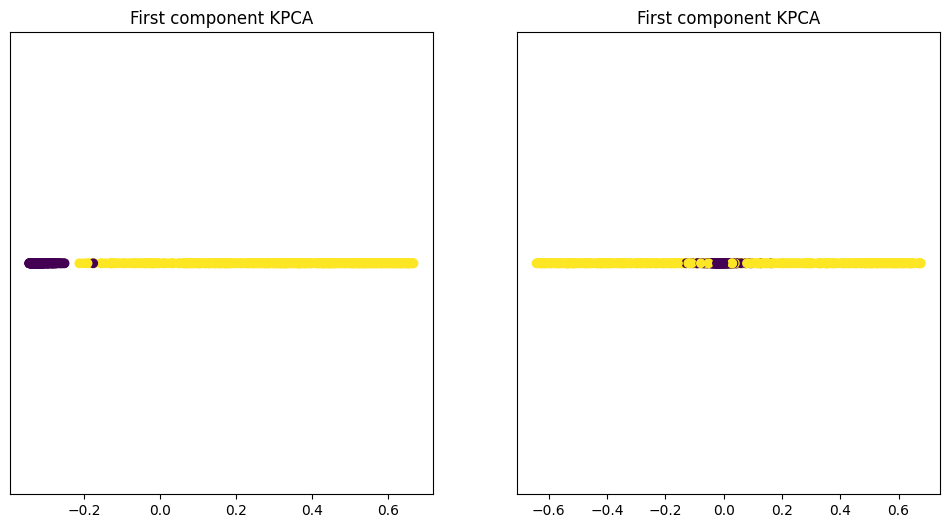

In [21]:
kpca = KernelPCA(n_components = None, kernel = 'rbf' , gamma= 10, alpha=0.1) 
KX_pca = kpca.fit_transform(X)

fig, ax = plt.subplots(1,2,figsize=(12,6))
  
ax[0].scatter(KX_pca[:,0], [1] * len(KX_pca[:,0]),c = y, cmap = 'viridis')
ax[0].set_yticks([])  
ax[0].set_title('First component KPCA')
ax[1].scatter(KX_pca[:,1], [1] * len(KX_pca[:,0]), c = y, cmap = 'viridis')
ax[1].set_yticks([])
ax[1].set_title('First component KPCA')

KXP_train, KXP_test, kyP_train, kyP_test = train_test_split(KX_pca, y, stratify = y, random_state=0)

In [22]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(XP_train, yP_train)
svc.score(XP_test,yP_test)

0.496

In [23]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(KXP_train, kyP_train)
svc.score(KXP_test,kyP_test)

0.992

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

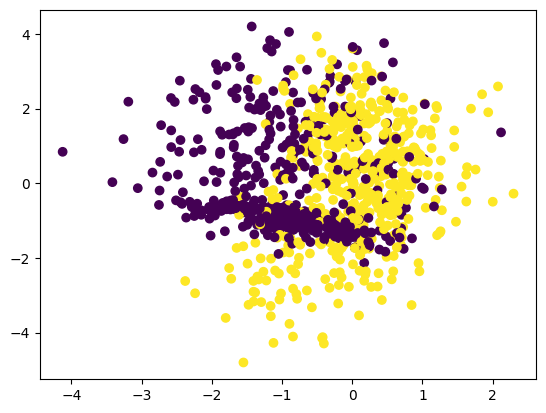

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=7, n_informative=4, n_redundant=3, n_classes=2, random_state=1)
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'viridis')

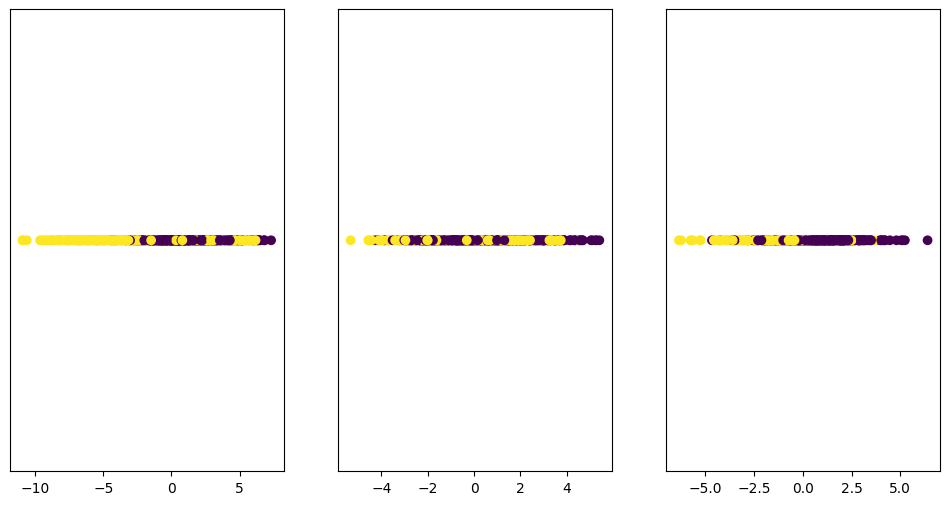

In [10]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(1,3,figsize=(12,6))
ax[0].scatter(X_pca[:,0], [1] * len(X_pca[:,0]),c = y, cmap = 'viridis')
ax[0].set_yticks([])  
ax[1].scatter(X_pca[:,1], [1] * len(X_pca[:,1]), c = y, cmap = 'viridis')
ax[1].set_yticks([]) 
ax[2].scatter(X_pca[:,2], [1] * len(X_pca[:,2]),c = y, cmap = 'viridis')
ax[2].set_yticks([])  

XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y, stratify = y, random_state=0)

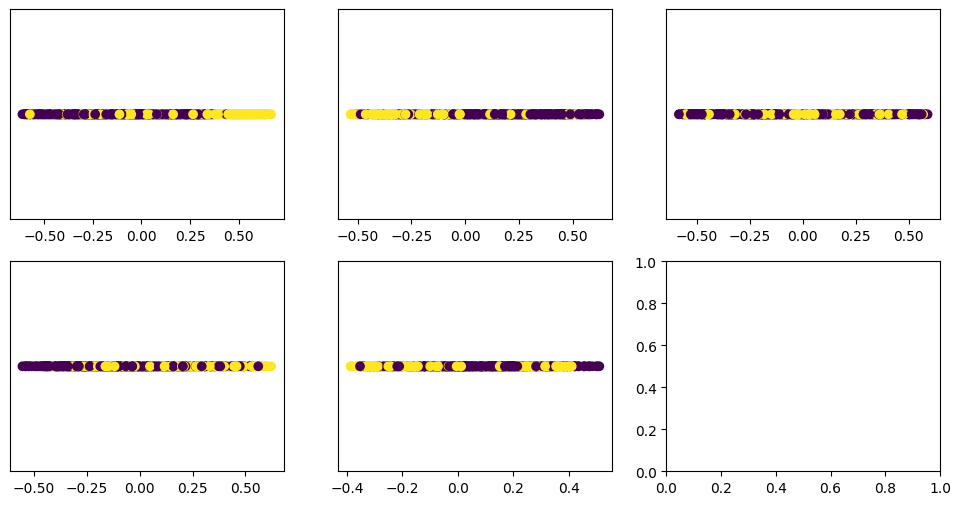

In [11]:
kpca = KernelPCA(n_components = None, kernel = 'rbf' , gamma = 0.1, alpha =10) 
KX_pca = kpca.fit_transform(X)
  
fig, ax = plt.subplots(2,3,figsize=(12,6))
ax[0,0].scatter(KX_pca[:,0], [1] * len(KX_pca[:,0]),c = y, cmap = 'viridis')
ax[0,0].set_yticks([])  
ax[0,1].scatter(KX_pca[:,1], [1] * len(KX_pca[:,1]), c = y, cmap = 'viridis')
ax[0,1].set_yticks([]) 
ax[0,2].scatter(KX_pca[:,2], [1] * len(KX_pca[:,2]),c = y, cmap = 'viridis')
ax[0,2].set_yticks([])  
ax[1,0].scatter(KX_pca[:,3], [1] * len(KX_pca[:,3]), c = y, cmap = 'viridis')
ax[1,0].set_yticks([]) 
ax[1,1].scatter(KX_pca[:,4], [1] * len(KX_pca[:,4]),c = y, cmap = 'viridis')
ax[1,1].set_yticks([]) 

KXP_train, KXP_test, kyP_train, kyP_test = train_test_split(KX_pca, y, stratify = y, random_state=0)

In [55]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(XP_train, yP_train)
svc.score(XP_test,yP_test)

0.496

In [64]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(KXP_train, kyP_train)
svc.score(KXP_test,kyP_test)

0.736

In [7]:
def Kernel_power(samples,  features, informatives, redundants, random_states, kernels, params):
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA, KernelPCA
    from sklearn.svm import LinearSVC
    import numpy as np
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV

    svc_accuracyes = []
    ksvc_accuracyes = []

    for i in range(len(samples)):
        X, y = make_classification(n_samples=samples[i], n_features=features[i], n_informative=informatives[i], n_redundant=redundants[i], n_classes=2, class_sep=0.5,random_state=random_states[i])
      
        pca = PCA(n_components=informatives[i])
        X_pca = pca.fit_transform(X)
        XP_train, XP_test, yP_train, yP_test = train_test_split(X_pca, y, stratify = y, random_state=0)
        svc = LinearSVC()
        svc.fit(XP_train, yP_train)
        svc_accuracyes.append(svc.score(XP_test,yP_test))

        kXP_train, kXP_test, kyP_train, kyP_test = train_test_split(X, y, stratify = y, random_state=0)
        pipeline = Pipeline([('kpca', KernelPCA(kernel='rbf')),('svc', LinearSVC())])
        param_grid = {'kpca__gamma': [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000],'kpca__alpha':[0.01,0.1,1,5,10,50,100,500,1000]}
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(kXP_train, kyP_train)
        best_model = grid_search.best_estimator_
        ksvc_accuracyes.append(best_model.score(kXP_test, kyP_test))


        #kpca = KernelPCA(n_components = None, kernel = kernels[i] , kernel_params= params) 
        #kX_pca = kpca.fit_transform(X)
        #kXP_train, kXP_test, kyP_train, kyP_test = train_test_split(kX_pca, y, stratify = y, random_state=0)
        #ksvc = LinearSVC()
        #ksvc.fit(kXP_train, kyP_train)
        #ksvc_accuracyes.append(ksvc.score(kXP_test,kyP_test))
        
    print('Accuracy media svm con PCA: ', np.mean(svc_accuracyes))
    print('Accuracy media svm con KPCA: ', np.mean(ksvc_accuracyes))

In [8]:
import numpy as np
random_states = np.arange(0,30)
samples = [1000]*len(random_states)
features = [7]*len(random_states)
informatives = [4]*len(random_states)
redundants = [3]*len(random_states)
kernels = ['rbf']*len(random_states)
params = [0.1,1]
params = {'gamma':[params[0]]*len(random_states), 'alpha': [params[1]] * len(random_states)}

Kernel_power(samples,features,informatives,redundants,random_states,kernels,params)

Accuracy media svm con PCA:  0.7121333333333333
Accuracy media svm con KPCA:  0.852
